Lotka-Volterra Model: By Ryan Reiff

Motivation: To visually represent population dynamics of the Isle Royale Wolf and Moose, in order to better observe

the predator prey relationship that exists between the two, interpret the application of the Lotka Volterra Model 

as a fit to the data trend and determine the extent to which variables other than predation impact population 

dynamics.

Methodologies: Fixed Point iteration and Cubic Spline Interpolation

We begin by first using Fixed Point Iteration in order to determine the equilibrium point or steady state

that our populations would need to exist at in order to observe no further population change in the two species.

This solution is purely theoretical, and is derived from the Lotka Volterra Model differential

equations. We show convergence upon a steady state solution does indeed exist by first assuming the parameters of the 

model (a,B,g,d) with purely arbitrary values, since the true values of these parameters are not included amongst the 

data collected in the Isle Royale Wolf Moose Study, and their accurate calculation would be beyond the scope and 

intentions of this project.

The equations used for the Fixed Point Iteration are explained in detail in the attached paper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def FixedPointMethod(X,Y):
    a = 12
    B = 4
    g = 5
    d = 1
    arr = np.array([X,Y])
    acc= np.zeros((100,2))
    for i in range (100):
        Xn1 = ((g*(arr[0])**(g-1))/d)**(1/g)
        Yn1 = ((a*(arr[1])**(a-1))/B)**(1/a)
        arr = np.array([Xn1,Yn1])
        acc[i] = arr
    print ( "Our Fixed Point solution is", arr, "\nOur Iterations can be stored and viewed as\n", acc)
FixedPointMethod(20,20)

Our Fixed Point solution is [5.         3.00094717] 
Our Iterations can be stored and viewed as
 [[15.15716567 17.07540188]
 [12.14194884 14.77180142]
 [10.16774673 12.93423588]
 [ 8.82213658 11.45132701]
 [ 7.8750446  10.24183881]
 [ 7.19111806  9.24570175]
 [ 6.68699711  8.41792388]
 [ 6.30926704  7.72439871]
 [ 6.02250444  7.13897833]
 [ 5.80250741  6.64140293]
 [ 5.63231018  6.21581788]
 [ 5.49975384  5.84969913]
 [ 5.39595852  5.53306586]
 [ 5.31433445  5.25789761]
 [ 5.2499251   5.01769838]
 [ 5.19896013  4.80716775]
 [ 5.1585446   4.62195034]
 [ 5.12643852  4.45844356]
 [ 5.10089758  4.31364868]
 [ 5.08055648  4.18505477]
 [ 5.06434202  4.07054745]
 [ 5.05140771  3.9683368 ]
 [ 5.04108406  3.87689987]
 [ 5.03284033  3.7949347 ]
 [ 5.02625505  3.72132317]
 [ 5.02099304  3.65510094]
 [ 5.01678739  3.59543299]
 [ 5.01342541  3.54159343]
 [ 5.01073745  3.49294904]
 [ 5.00858811  3.44894551]
 [ 5.00686931  3.4090961 ]
 [ 5.00549469  3.37297206]
 [ 5.00439527  3.34019473]
 [ 5.0035159

Now performing Cubic Spline Interpolation using data collected from the Isle Royale Wolf Moose Population. This

data was collected during a study that took place from the 1950s up until 2019. 

This interpolation is being performed in order to better visualize the predator prey relationship between

the two species, and see if the Lotka Volterra Predator Prey Model is an appropriate fit for our data.

The individual colored segments of the graph represent individual polynomails up to degree three (cubic) that our

interpolation is made up of. 

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
def CubicSplines():
    init_printing(use_latex=False)
    x=symbols("x")
    df1 = pd.read_csv('/Users/RyanReiff/Documents/IsleRoyaleDataWolves.csv')
    W = df1.values
    df2 = pd.read_csv('/Users/RyanReiff/Documents/IsleRoyaleDataMoose.csv')
    M = df2.values
    N=[]
    h = 1
    for i in range (1,len(W)+1):
        N.append(i)
    B = [0.0]
    for i in range (0,len(W)-2):
        B.append(float((3/h)*(W[i+2]-W[i+1])-(3/h)*(W[i+1]-W[i])))
    B.append(float(0))
    A = np.zeros((len(W),len(W)))
    for i in range(0,len(W)):
        A[i][i] = 4
    for i in range(0,len(W)-1):
        A[i][i+1]=1
    for i in range(0,len(W)-1):
        A[i+1][i]=1
    A[0][0]=1
    A[len(W)-1][len(W)-1]=1
    c = np.linalg.solve(A,B)
    b=[]
    d=[]
    F=[]
    for i in range (0,len(W)-1):
        b.append((1/h)*(W[i+1]-W[i])-(h/3)*(c[i+1]+2*c[i]))
    for i in range (0,len(W)-1):
        d.append((1/(3*h))*(c[i+1]-c[i]))
    for i in range (0,len(W)-1):
        F.append((W[i]+b[i]*(x-(i+1))+c[i]*(x-(i+1))**2+d[i]*(x-(i+1))**3)[0])
    return(F)
CubicSplines()

⎡                                              3                           2  
⎣0.995376303192973⋅x - 2.00924739361405⋅(x - 1)  + 3.01387109042108⋅(x - 1)  +

                                                                3             
 19.004623696807, 0.995376303192973⋅x + 2.01849478722811⋅(x - 2)  - 3.01387109

              2                                                               
042108⋅(x - 2)  + 20.0092473936141, 1.02311848403513⋅x - 3.06473175529837⋅(x -

   3                           2                                              
 3)  + 3.04161327126324⋅(x - 3)  + 18.9306445478946, -2.08785023933351⋅x + 5.2

                     3                           2                            
4043223396538⋅(x - 4)  - 6.15258199463188⋅(x - 4)  + 31.351400957334, 1.328282

                                     3                           2            
47329889⋅x - 4.89699718056316⋅(x - 5)  + 9.56871470726427⋅(x - 5)  + 13.358587

                                              

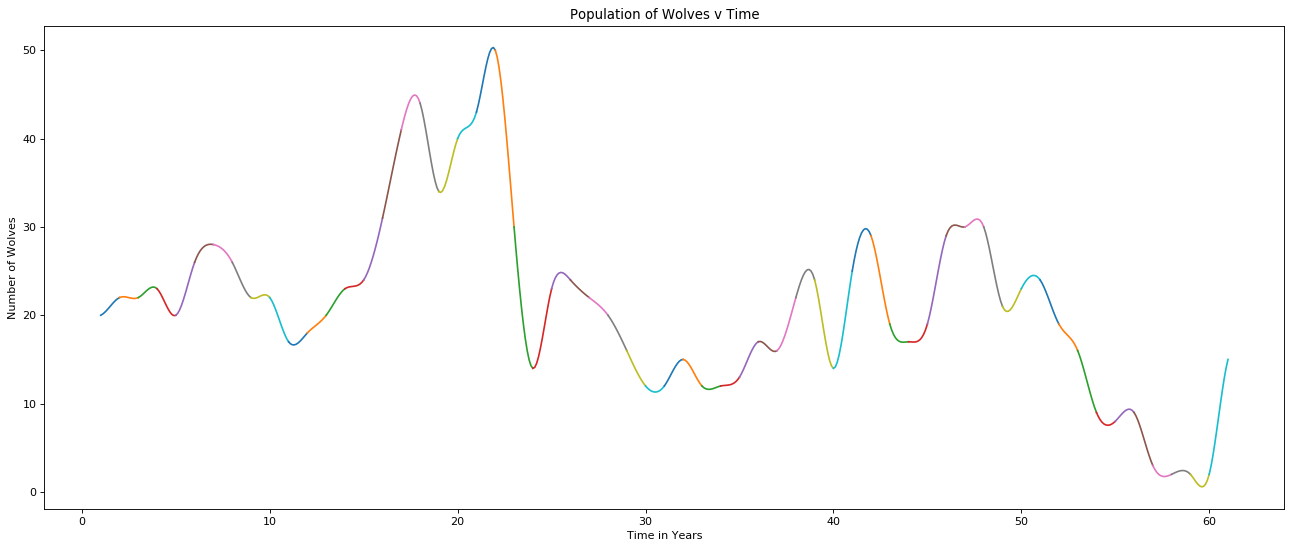

In [3]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

def WolfGraph():
    for i in range(0,60):
        x = np.arange(i+1,i+2.01,0.1)
        y = [0.995376303192973*x - 2.00924739361405*(x - 1)**3 + 3.01387109042108*(x - 1)**2 + 19.004623696807, 0.995376303192973*x + 2.01849478722811*(x - 2)**3 - 3.01387109042108*(x - 2)**2 + 20.0092473936141, 1.02311848403513*x - 3.06473175529837*(x - 3)**3 + 3.04161327126324*(x - 3)**2 + 18.9306445478946, -2.08785023933351*x + 5.24043223396538*(x - 4)**3 - 6.15258199463188*(x - 4)**2 + 31.351400957334, 1.32828247329889*x - 4.89699718056316*(x - 5)**3 + 9.56871470726427*(x - 5)**2 + 13.3585876335055, 5.77472034613795*x + 1.34755648828727*(x - 6)**3 - 5.12227683442522*(x - 6)**2 - 8.64832207682768, -0.427163857850676*x - 0.493228772585919*(x - 7)**3 - 1.07960736956341*(x - 7)**2 + 30.9901470049547, -4.06606491473524*x + 2.62535860205641*(x - 8)**3 - 2.55929368732116*(x - 8)**2 + 58.5285193178819, -1.30857648320835*x - 4.00820563563971*(x - 9)**3 + 5.31678211884806*(x - 9)**2 + 33.7771883488751, -2.69962915243136*x + 4.40746394050242*(x - 10)**3 - 6.70783478807106*(x - 10)**2 + 48.9962915243136, -2.89290690706623*x - 2.62165012636996*(x - 11)**3 + 6.51455703343619*(x - 11)**2 + 48.8219759777285, 2.27125678069626*x + 1.07913656497744*(x - 12)**3 - 1.3503933456737*(x - 12)**2 - 9.25508136835514, 2.80787978428118*x - 1.6948961335398*(x - 13)**3 + 1.88701634925862*(x - 13)**2 - 16.5024371956553, 1.49722408217902*x + 2.70044796918177*(x - 14)**3 - 3.19767205136079*(x - 14)**2 + 2.03886284949378, 3.20322388700276*x - 1.10689574318728*(x - 15)**3 + 4.90367185618453*(x - 15)**2 - 24.0483583050413, 9.68988036980996*x - 1.27286499643265*(x - 16)**3 + 1.58298462662268*(x - 16)**2 - 124.038085916959, 9.03725463375739*x - 3.80164427108213*(x - 17)**3 - 2.23561036267526*(x - 17)**2 - 112.633328773876, -6.83889890483952*x + 10.4794420807612*(x - 18)**3 - 13.6405431759217*(x - 18)**2 + 167.100180287111, -2.6816590143993*x - 9.11612405196257*(x - 19)**3 + 17.7977830663619*(x - 19)**2 + 84.9515212735868, 5.56553496243673*x + 6.98505412708912*(x - 20)**3 - 9.55058908952584*(x - 20)**2 - 71.3106992487346, 7.41951916465239*x - 11.8240924563939*(x - 21)**3 + 11.4045732917415*(x - 21)**2 - 112.8099024577, -5.24361162104629*x + 9.31131569848648*(x - 22)**3 - 24.0677040774402*(x - 22)**2 + 165.359455663018, -25.4450726804672*x + 5.57882966244798*(x - 23)**3 + 3.86624301801925*(x - 23)**2 + 615.236671650746, -0.976097657084788*x - 10.6266343482784*(x - 24)**3 + 20.6027320053632*(x - 24)**2 + 37.4263437700349, 8.34946330880638*x + 3.92770773066564*(x - 25)**3 - 11.277171039472*(x - 25)**2 - 185.73658272016, -2.42175557814074*x - 0.0841965743841551*(x - 26)**3 + 0.505952152524897*(x - 26)**2 + 86.9656450316593, -1.66244099624341*x - 0.590921433129019*(x - 27)**3 + 0.253362429372432*(x - 27)**2 + 66.8859068985721, -2.92848043688561*x + 0.447882306900232*(x - 28)**3 - 1.51940187001463*(x - 28)**2 + 101.997452232797, -4.62363725621416*x + 0.799392205528092*(x - 29)**3 - 0.17575494931393*(x - 29)**2 + 150.085480430211, -2.57697053825775*x + 0.354548870987399*(x - 30)**3 + 2.22242166727035*(x - 30)**2 + 89.3091161477324, 2.93151940924514*x - 3.21758768947769*(x - 31)**3 + 3.28606828023254*(x - 31)**2 - 78.8771016865995, -0.149107098722833*x + 3.51580188692336*(x - 32)**3 - 6.36669478820052*(x - 32)**2 + 19.7714271591307, -2.33509101435381*x - 1.84561985821573*(x - 33)**3 + 4.18071087256954*(x - 33)**2 + 89.0580034736757, 0.489471156138075*x + 1.86667754593958*(x - 34)**3 - 1.35614870207766*(x - 34)**2 - 4.64201930869456, 3.37720638980151*x - 3.6210903255426*(x - 35)**3 + 4.24388393574109*(x - 35)**2 - 105.202223643053, 1.00170328465589*x + 4.61768375623083*(x - 36)**3 - 6.61938704088672*(x - 36)**2 - 19.061318247612, 1.61598047157494*x - 2.8496446993807*(x - 37)**3 + 7.23366422780576*(x - 37)**2 - 43.7912774482727, 7.53437482904436*x - 4.21910495870802*(x - 38)**3 - 1.31526987033634*(x - 38)**2 - 264.306243503686, -7.75347978775238*x + 11.7260645342128*(x - 39)**3 - 13.9725847464604*(x - 39)**2 + 326.385711722343, -0.520455678034843*x - 9.6851531781431*(x - 40)**3 + 21.2056088561779*(x - 40)**2 + 34.8182271213937, 12.8353024998917*x - 0.985451821640388*(x - 41)**3 - 7.84985067825136*(x - 41)**2 - 501.247402495561, -5.82075432153213*x + 6.62696046470465*(x - 42)**3 - 10.8062061431725*(x - 42)**2 + 273.47168150435, -7.55228521376322*x - 3.52239003717821*(x - 43)**3 + 9.07467525094143*(x - 43)**2 + 343.748264191818, 0.0298951765850073*x + 3.4625996840082*(x - 44)**3 - 1.4924948605932*(x - 44)**2 + 15.6846122302597, 7.43270450742319*x - 6.32800869885458*(x - 45)**3 + 8.89530419143139*(x - 45)**2 - 315.471702834044, 6.23928679372223*x + 4.84943511141011*(x - 46)**3 - 10.0887219051323*(x - 46)**2 - 258.007192511223, 0.610148317687872*x - 5.06973174678585*(x - 47)**3 + 4.45958342909798*(x - 47)**2 + 1.32302906867002, -5.67988006447372*x + 7.4294918757333*(x - 48)**3 - 10.7496118112596*(x - 48)**2 + 302.634243094739, -4.89062805979298*x - 4.64823575614734*(x - 49)**3 + 11.5388638159403*(x - 49)**2 + 260.640774929856, 4.24239230364564*x - 0.83654885114394*(x - 50)**3 - 2.4058434525017*(x - 50)**2 - 189.119615182282, -3.07894115478958*x + 2.9944311607231*(x - 51)**3 - 4.91549000593352*(x - 51)**2 + 181.025998894268, -3.92662768448732*x - 3.14117579174845*(x - 52)**3 + 4.06780347623577*(x - 52)**2 + 223.184639593341, -5.21454810726112*x + 3.5702720062707*(x - 53)**3 - 5.35572389900957*(x - 53)**2 + 292.37104968484, -5.21517988646818*x - 1.13991223333433*(x - 54)**3 + 5.35509211980251*(x - 54)**2 + 290.619713869282, 2.07526765313385*x - 3.01062307293336*(x - 55)**3 + 1.93535541979951*(x - 55)**2 - 106.139720922362, -3.08589072606721*x + 4.18240452506778*(x - 56)**3 - 7.09651379900057*(x - 56)**2 + 181.809880659764, -4.73170474886501*x - 1.71899502733776*(x - 57)**3 + 5.45069977620277*(x - 57)**2 + 272.707170685306, 1.01270972152726*x - 1.30642441571676*(x - 58)**3 + 0.293714694189501*(x - 58)**2 - 56.7371638485809, -2.31913413724401*x + 5.94469269020479*(x - 59)**3 - 3.62555855296077*(x - 59)**2 + 138.828914097397, 8.2638268274488*x - 9.47234634510239*(x - 60)**3 + 14.2085195176536*(x - 60)**2 - 493.829609646928]
        plt.plot(x,y[i])
    plt.xlabel('Time in Years')
    plt.ylabel('Number of Wolves')
    plt.title("Population of Wolves v Time")
    plt.axis
WolfGraph()

In [4]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
def CubicSplines2():
    init_printing(use_latex=False)
    x=symbols("x")
    df1 = pd.read_csv('/Users/RyanReiff/Documents/IsleRoyaleDataWolves.csv')
    W = df1.values
    df2 = pd.read_csv('/Users/RyanReiff/Documents/IsleRoyaleDataMoose.csv')
    M = df2.values
    N=[]
    h = 1
    for i in range (1,len(M)+1):
        N.append(i)
    B = [0.0]
    for i in range (0,len(M)-2):
        B.append(float((3/h)*(M[i+2]-M[i+1])-(3/h)*(M[i+1]-M[i])))
    B.append(float(0))
    A = np.zeros((len(M),len(M)))
    for i in range(0,len(M)):
        A[i][i] = 4
    for i in range(0,len(M)-1):
        A[i][i+1]=1
    for i in range(0,len(M)-1):
        A[i+1][i]=1
    A[0][0]=1
    A[len(M)-1][len(M)-1]=1
    c = np.linalg.solve(A,B)
    b=[]
    d=[]
    F=[]
    for i in range (0,len(M)-1):
        b.append((1/h)*(M[i+1]-M[i])-(h/3)*(c[i+1]+2*c[i]))
    for i in range (0,len(M)-1):
        d.append((1/(3*h))*(c[i+1]-c[i]))
    for i in range (0,len(M)-1):
        F.append((M[i]+b[i]*(x-(i+1))+c[i]*(x-(i+1))**2+d[i]*(x-(i+1))**3)[0])
    return(F)
CubicSplines2()

⎡                                             3                           2   
⎣19.7107589444068⋅x - 12.5784821111865⋅(x - 1)  + 18.8677231667797⋅(x - 1)  + 

                                                               3              
518.289241055593, 19.7107589444068⋅x + 7.15696422237291⋅(x - 2)  - 18.86772316

             2                                                                
67797⋅(x - 2)  + 524.578482111186, 3.44620527796613⋅x + 0.950625221694824⋅(x -

   3                           2                                              
 3)  + 2.60316950033904⋅(x - 3)  + 561.661384166102, 11.5044199437287⋅x + 0.04

                      3                           2                           
05348908477986⋅(x - 4)  + 5.45504516542351⋅(x - 4)  + 532.982320225085, 22.536

                                       3                           2          
1149471191⋅x - 4.11276478508602⋅(x - 5)  + 5.57664983796691⋅(x - 5)  + 483.319

                                              

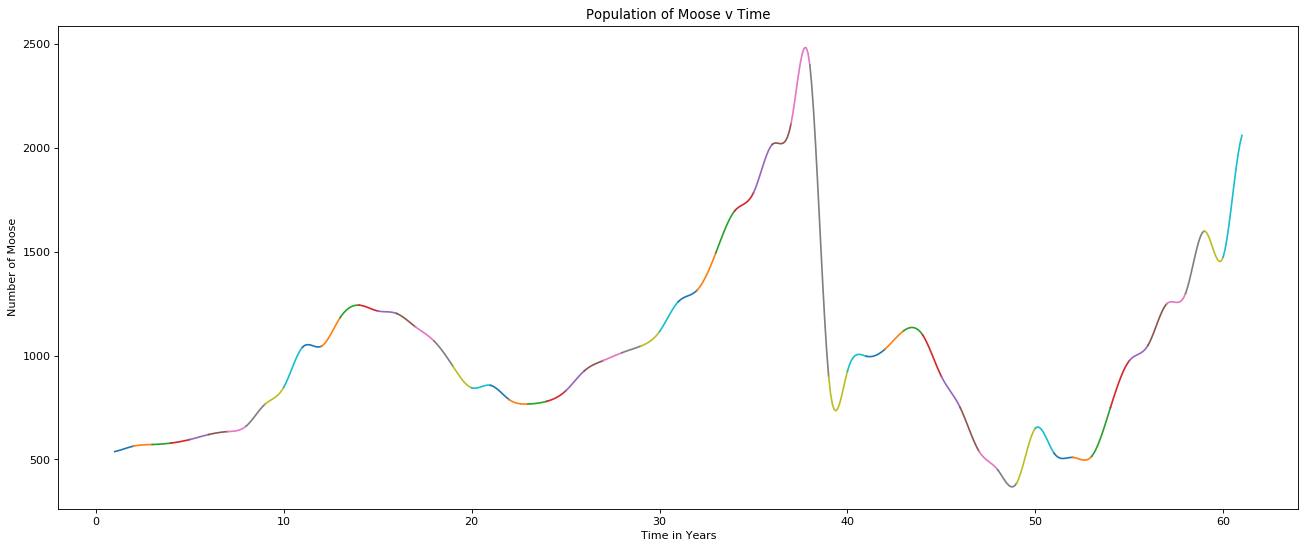

In [5]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

def MooseGraph():
    for i in range(0,60):
        x = np.arange(i+1,i+2.01,0.1)
        y = [19.7107589444068*x - 12.5784821111865*(x - 1)**3 + 18.8677231667797*(x - 1)**2 + 518.289241055593, 19.7107589444068*x + 7.15696422237291*(x - 2)**3 - 18.8677231667797*(x - 2)**2 + 524.578482111186, 3.44620527796613*x + 0.950625221694824*(x - 3)**3 + 2.60316950033904*(x - 3)**2 + 561.661384166102, 11.5044199437287*x + 0.0405348908477986*(x - 4)**3 + 5.45504516542351*(x - 4)**2 + 532.982320225085, 22.5361149471191*x - 4.11276478508602*(x - 5)**3 + 5.57664983796691*(x - 5)**2 + 483.319425264404, 21.3511202677949*x - 0.589475750503725*(x - 6)**3 - 6.76164451729115*(x - 6)**2 + 491.893278393231, 6.0594039817014*x + 29.4706677871009*(x - 7)**3 - 8.53007176880232*(x - 7)**2 + 591.58417212809, 77.4112638053995*x - 52.2931953979*(x - 8)**3 + 79.8819315925004*(x - 8)**2 + 41.7098895568039, 80.2955407967005*x + 78.7021138044989*(x - 9)**3 - 76.9976546011994*(x - 9)**2 + 43.3401328296952, 162.406573007798*x - 128.515259820096*(x - 10)**3 + 159.108686812297*(x - 10)**2 - 776.065730077984, 95.0781671721061*x + 135.358925475883*(x - 11)**3 - 226.437092647989*(x - 11)**2 - 4.85983889316708, 48.2807583037773*x - 89.9204420834379*(x - 12)**3 + 179.639683779661*(x - 12)**2 + 465.630900354673, 137.798799612785*x + 12.3228428578682*(x - 13)**3 - 90.1216424706531*(x - 13)**2 - 608.384394966203, -5.4759567549166*x + 30.629070651965*(x - 14)**3 - 53.1531138970484*(x - 14)**2 + 1319.66339456883, -19.8949725931184*x - 30.8391254657281*(x - 15)**3 + 38.7340980588466*(x - 15)**2 + 1513.42458889678, -34.9441528726097*x + 24.7274312109476*(x - 16)**3 - 53.7832783383378*(x - 16)**2 + 1762.10644596176, -68.3284159164427*x - 21.0705993780621*(x - 17)**3 + 20.3990152945048*(x - 17)**2 + 2300.58307057953, -90.7421834616194*x + 12.554966301301*(x - 18)**3 - 42.8127828396815*(x - 18)**2 + 2703.35930230915, -138.70285023708*x + 39.8507341728583*(x - 19)**3 - 5.14788393577868*(x - 19)**2 + 3584.35415450451, -29.4464155900621*x - 72.9579029927342*(x - 20)**3 + 114.404318582796*(x - 20)**2 + 1433.92831180124, -19.5114874026721*x + 54.9808777980784*(x - 21)**3 - 104.469390395406*(x - 21)**2 + 1266.74123545611, -63.5076347992495*x - 17.9656081995795*(x - 22)**3 + 60.473242998829*(x - 22)**2 + 2185.16796558349, 3.54202659966996*x + 2.88155500023957*(x - 23)**3 + 6.57641840009047*(x - 23)**2 + 685.533388207591, 25.3395284005696*x + 9.4393881986212*(x - 24)**3 + 15.2210834008092*(x - 24)**2 + 171.851318386329, 84.0998597980516*x - 30.6391077947244*(x - 25)**3 + 43.5392479966728*(x - 25)**2 - 1272.49649495129, 79.261032407224*x + 18.1170429802763*(x - 26)**3 - 48.3780753875003*(x - 26)**2 - 1133.78684258783, 36.8560105730523*x - 4.8290641263808*(x - 27)**3 + 5.97305355332855*(x - 27)**2 - 19.1122854724108, 34.3149253005669*x + 6.19921352524692*(x - 28)**3 - 8.51413882581386*(x - 28)**2 + 53.1820915841256, 35.88428822468*x + 24.0322100253931*(x - 29)**3 + 10.0835017499269*(x - 29)**2 + 5.35564148428034, 128.147921800713*x - 66.3280536268193*(x - 30)**3 + 82.1801318261062*(x - 30)**2 - 2728.43765402139, 93.5240245724675*x + 78.2800044818843*(x - 31)**3 - 116.804029054352*(x - 31)**2 - 1639.24476174649, 94.7559799094167*x - 31.7919643007177*(x - 32)**3 + 118.035984391301*(x - 32)**2 - 1717.19135710134, 235.452055789866*x - 57.1121472790135*(x - 33)**3 + 22.6600914891479*(x - 33)**2 - 6273.91784106556, 109.435796931121*x + 126.240553416772*(x - 34)**3 - 148.676350347893*(x - 34)**2 - 2023.81709565811, 190.804756485651*x - 187.850066388073*(x - 35)**3 + 230.045309902422*(x - 35)**2 - 4894.16647699777, 87.3451771262764*x + 346.15971213552*(x - 36)**3 - 333.504889261796*(x - 36)**2 - 1127.42637654595, 458.814535009244*x - 882.788782154007*(x - 37)**3 + 704.974247144764*(x - 37)**2 - 14859.137795342, -779.603317163251*x + 1224.99541648051*(x - 38)**3 - 1943.39209931726*(x - 38)**2 + 32022.9260522035, -991.401266356239*x - 715.192883768031*(x - 39)**3 + 1731.59415012427*(x - 39)**2 + 39564.6493878933, 326.208382588208*x + 159.776118591616*(x - 40)**3 - 413.984501179823*(x - 40)**2 - 12123.3353035283, -22.4322639965923*x - 8.91159059843091*(x - 41)**3 + 65.3438545950232*(x - 41)**2 + 1916.72282386028, 81.5206733981614*x - 31.1297561978919*(x - 42)**3 + 38.6090827997305*(x - 42)**2 - 2392.86828272278, 65.3495704039467*x - 30.5693846100015*(x - 43)**3 - 54.7801857939452*(x - 43)**2 - 1690.03152736971, -135.918955013948*x + 82.407294637898*(x - 44)**3 - 146.48833962395*(x - 44)**2 + 7080.43402061372, -181.673750348154*x - 69.0597939415906*(x - 45)**3 + 100.733544289744*(x - 45)**2 + 9075.31876566692, -187.386043593437*x + 83.8318811284643*(x - 46)**3 - 106.445837535027*(x - 46)**2 + 9369.7580052981, -148.782075278099*x - 86.2677305722668*(x - 47)**3 + 145.049805850366*(x - 47)**2 + 7532.75753807064, -117.485655294168*x + 166.239041160603*(x - 48)**3 - 113.753385866435*(x - 48)**2 + 6089.31145412007, 153.724696454771*x - 273.688434070145*(x - 49)**3 + 384.963737615374*(x - 49)**2 - 7147.51012628378, 102.586869475084*x + 213.514695119977*(x - 50)**3 - 436.101564595061*(x - 50)**2 - 4479.3434737542, -129.072174355107*x - 95.3703464097628*(x - 51)**3 + 204.44252076487*(x - 51)**2 + 7112.68089211046, -6.29817205465571*x + 92.9666905190742*(x - 52)**3 - 81.6685184644185*(x - 52)**2 + 837.504946842097, 109.26486257373*x - 71.4964156665341*(x - 53)**3 + 197.231553092804*(x - 53)**2 - 5276.03771640769, 289.238721759736*x - 46.9810278529378*(x - 54)**3 - 17.2576939067981*(x - 54)**2 - 14868.8909750257, 113.780250387326*x + 119.420527078285*(x - 55)**3 - 158.200777465612*(x - 55)**2 - 5282.91377130294, 155.640276690959*x - 155.701080460204*(x - 56)**3 + 200.060803769244*(x - 56)**2 - 7665.85549469371, 88.6586428488374*x + 228.383794762529*(x - 57)**3 - 267.042437611366*(x - 57)**2 - 3803.54264238373, 239.725151913691*x - 357.834098589912*(x - 58)**3 + 418.10894667622*(x - 58)**2 - 12604.0588109941, 2.44074949639703*x + 527.952599597118*(x - 59)**3 - 655.393349093515*(x - 59)**2 + 1455.99577971258, 275.511850100721*x - 618.976299798559*(x - 60)**3 + 928.464449697838*(x - 60)**2 - 15055.7110060432]
        plt.plot(x,y[i])
    plt.xlabel('Time in Years')
    plt.ylabel('Number of Moose')
    plt.title("Population of Moose v Time")
    plt.axis
MooseGraph()

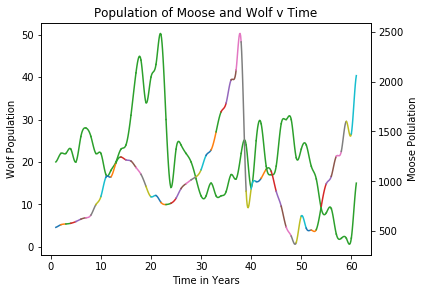

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def FinalPlot():
    fig, ax1 = plt.subplots()

    color = 'tab:green'
    ax1.set_xlabel('Time in Years')
    ax1.set_ylabel('Wolf Population')

    for i in range (0,60):
        x = np.arange(i+1,i+2.01,0.1)
        y = [0.995376303192973*x - 2.00924739361405*(x - 1)**3 + 3.01387109042108*(x - 1)**2 + 19.004623696807, 0.995376303192973*x + 2.01849478722811*(x - 2)**3 - 3.01387109042108*(x - 2)**2 + 20.0092473936141, 1.02311848403513*x - 3.06473175529837*(x - 3)**3 + 3.04161327126324*(x - 3)**2 + 18.9306445478946, -2.08785023933351*x + 5.24043223396538*(x - 4)**3 - 6.15258199463188*(x - 4)**2 + 31.351400957334, 1.32828247329889*x - 4.89699718056316*(x - 5)**3 + 9.56871470726427*(x - 5)**2 + 13.3585876335055, 5.77472034613795*x + 1.34755648828727*(x - 6)**3 - 5.12227683442522*(x - 6)**2 - 8.64832207682768, -0.427163857850676*x - 0.493228772585919*(x - 7)**3 - 1.07960736956341*(x - 7)**2 + 30.9901470049547, -4.06606491473524*x + 2.62535860205641*(x - 8)**3 - 2.55929368732116*(x - 8)**2 + 58.5285193178819, -1.30857648320835*x - 4.00820563563971*(x - 9)**3 + 5.31678211884806*(x - 9)**2 + 33.7771883488751, -2.69962915243136*x + 4.40746394050242*(x - 10)**3 - 6.70783478807106*(x - 10)**2 + 48.9962915243136, -2.89290690706623*x - 2.62165012636996*(x - 11)**3 + 6.51455703343619*(x - 11)**2 + 48.8219759777285, 2.27125678069626*x + 1.07913656497744*(x - 12)**3 - 1.3503933456737*(x - 12)**2 - 9.25508136835514, 2.80787978428118*x - 1.6948961335398*(x - 13)**3 + 1.88701634925862*(x - 13)**2 - 16.5024371956553, 1.49722408217902*x + 2.70044796918177*(x - 14)**3 - 3.19767205136079*(x - 14)**2 + 2.03886284949378, 3.20322388700276*x - 1.10689574318728*(x - 15)**3 + 4.90367185618453*(x - 15)**2 - 24.0483583050413, 9.68988036980996*x - 1.27286499643265*(x - 16)**3 + 1.58298462662268*(x - 16)**2 - 124.038085916959, 9.03725463375739*x - 3.80164427108213*(x - 17)**3 - 2.23561036267526*(x - 17)**2 - 112.633328773876, -6.83889890483952*x + 10.4794420807612*(x - 18)**3 - 13.6405431759217*(x - 18)**2 + 167.100180287111, -2.6816590143993*x - 9.11612405196257*(x - 19)**3 + 17.7977830663619*(x - 19)**2 + 84.9515212735868, 5.56553496243673*x + 6.98505412708912*(x - 20)**3 - 9.55058908952584*(x - 20)**2 - 71.3106992487346, 7.41951916465239*x - 11.8240924563939*(x - 21)**3 + 11.4045732917415*(x - 21)**2 - 112.8099024577, -5.24361162104629*x + 9.31131569848648*(x - 22)**3 - 24.0677040774402*(x - 22)**2 + 165.359455663018, -25.4450726804672*x + 5.57882966244798*(x - 23)**3 + 3.86624301801925*(x - 23)**2 + 615.236671650746, -0.976097657084788*x - 10.6266343482784*(x - 24)**3 + 20.6027320053632*(x - 24)**2 + 37.4263437700349, 8.34946330880638*x + 3.92770773066564*(x - 25)**3 - 11.277171039472*(x - 25)**2 - 185.73658272016, -2.42175557814074*x - 0.0841965743841551*(x - 26)**3 + 0.505952152524897*(x - 26)**2 + 86.9656450316593, -1.66244099624341*x - 0.590921433129019*(x - 27)**3 + 0.253362429372432*(x - 27)**2 + 66.8859068985721, -2.92848043688561*x + 0.447882306900232*(x - 28)**3 - 1.51940187001463*(x - 28)**2 + 101.997452232797, -4.62363725621416*x + 0.799392205528092*(x - 29)**3 - 0.17575494931393*(x - 29)**2 + 150.085480430211, -2.57697053825775*x + 0.354548870987399*(x - 30)**3 + 2.22242166727035*(x - 30)**2 + 89.3091161477324, 2.93151940924514*x - 3.21758768947769*(x - 31)**3 + 3.28606828023254*(x - 31)**2 - 78.8771016865995, -0.149107098722833*x + 3.51580188692336*(x - 32)**3 - 6.36669478820052*(x - 32)**2 + 19.7714271591307, -2.33509101435381*x - 1.84561985821573*(x - 33)**3 + 4.18071087256954*(x - 33)**2 + 89.0580034736757, 0.489471156138075*x + 1.86667754593958*(x - 34)**3 - 1.35614870207766*(x - 34)**2 - 4.64201930869456, 3.37720638980151*x - 3.6210903255426*(x - 35)**3 + 4.24388393574109*(x - 35)**2 - 105.202223643053, 1.00170328465589*x + 4.61768375623083*(x - 36)**3 - 6.61938704088672*(x - 36)**2 - 19.061318247612, 1.61598047157494*x - 2.8496446993807*(x - 37)**3 + 7.23366422780576*(x - 37)**2 - 43.7912774482727, 7.53437482904436*x - 4.21910495870802*(x - 38)**3 - 1.31526987033634*(x - 38)**2 - 264.306243503686, -7.75347978775238*x + 11.7260645342128*(x - 39)**3 - 13.9725847464604*(x - 39)**2 + 326.385711722343, -0.520455678034843*x - 9.6851531781431*(x - 40)**3 + 21.2056088561779*(x - 40)**2 + 34.8182271213937, 12.8353024998917*x - 0.985451821640388*(x - 41)**3 - 7.84985067825136*(x - 41)**2 - 501.247402495561, -5.82075432153213*x + 6.62696046470465*(x - 42)**3 - 10.8062061431725*(x - 42)**2 + 273.47168150435, -7.55228521376322*x - 3.52239003717821*(x - 43)**3 + 9.07467525094143*(x - 43)**2 + 343.748264191818, 0.0298951765850073*x + 3.4625996840082*(x - 44)**3 - 1.4924948605932*(x - 44)**2 + 15.6846122302597, 7.43270450742319*x - 6.32800869885458*(x - 45)**3 + 8.89530419143139*(x - 45)**2 - 315.471702834044, 6.23928679372223*x + 4.84943511141011*(x - 46)**3 - 10.0887219051323*(x - 46)**2 - 258.007192511223, 0.610148317687872*x - 5.06973174678585*(x - 47)**3 + 4.45958342909798*(x - 47)**2 + 1.32302906867002, -5.67988006447372*x + 7.4294918757333*(x - 48)**3 - 10.7496118112596*(x - 48)**2 + 302.634243094739, -4.89062805979298*x - 4.64823575614734*(x - 49)**3 + 11.5388638159403*(x - 49)**2 + 260.640774929856, 4.24239230364564*x - 0.83654885114394*(x - 50)**3 - 2.4058434525017*(x - 50)**2 - 189.119615182282, -3.07894115478958*x + 2.9944311607231*(x - 51)**3 - 4.91549000593352*(x - 51)**2 + 181.025998894268, -3.92662768448732*x - 3.14117579174845*(x - 52)**3 + 4.06780347623577*(x - 52)**2 + 223.184639593341, -5.21454810726112*x + 3.5702720062707*(x - 53)**3 - 5.35572389900957*(x - 53)**2 + 292.37104968484, -5.21517988646818*x - 1.13991223333433*(x - 54)**3 + 5.35509211980251*(x - 54)**2 + 290.619713869282, 2.07526765313385*x - 3.01062307293336*(x - 55)**3 + 1.93535541979951*(x - 55)**2 - 106.139720922362, -3.08589072606721*x + 4.18240452506778*(x - 56)**3 - 7.09651379900057*(x - 56)**2 + 181.809880659764, -4.73170474886501*x - 1.71899502733776*(x - 57)**3 + 5.45069977620277*(x - 57)**2 + 272.707170685306, 1.01270972152726*x - 1.30642441571676*(x - 58)**3 + 0.293714694189501*(x - 58)**2 - 56.7371638485809, -2.31913413724401*x + 5.94469269020479*(x - 59)**3 - 3.62555855296077*(x - 59)**2 + 138.828914097397, 8.2638268274488*x - 9.47234634510239*(x - 60)**3 + 14.2085195176536*(x - 60)**2 - 493.829609646928]
        ax1.plot(x, y[i], color=color) 
    ax1.tick_params(axis='y') 

    ax2 = ax1.twinx()  

    ax2.set_ylabel('Moose Polulation') 

    for i in range (0,60):
        x = np.arange(i+1,i+2.01,0.1)
        y = [19.7107589444068*x - 12.5784821111865*(x - 1)**3 + 18.8677231667797*(x - 1)**2 + 518.289241055593, 19.7107589444068*x + 7.15696422237291*(x - 2)**3 - 18.8677231667797*(x - 2)**2 + 524.578482111186, 3.44620527796613*x + 0.950625221694824*(x - 3)**3 + 2.60316950033904*(x - 3)**2 + 561.661384166102, 11.5044199437287*x + 0.0405348908477986*(x - 4)**3 + 5.45504516542351*(x - 4)**2 + 532.982320225085, 22.5361149471191*x - 4.11276478508602*(x - 5)**3 + 5.57664983796691*(x - 5)**2 + 483.319425264404, 21.3511202677949*x - 0.589475750503725*(x - 6)**3 - 6.76164451729115*(x - 6)**2 + 491.893278393231, 6.0594039817014*x + 29.4706677871009*(x - 7)**3 - 8.53007176880232*(x - 7)**2 + 591.58417212809, 77.4112638053995*x - 52.2931953979*(x - 8)**3 + 79.8819315925004*(x - 8)**2 + 41.7098895568039, 80.2955407967005*x + 78.7021138044989*(x - 9)**3 - 76.9976546011994*(x - 9)**2 + 43.3401328296952, 162.406573007798*x - 128.515259820096*(x - 10)**3 + 159.108686812297*(x - 10)**2 - 776.065730077984, 95.0781671721061*x + 135.358925475883*(x - 11)**3 - 226.437092647989*(x - 11)**2 - 4.85983889316708, 48.2807583037773*x - 89.9204420834379*(x - 12)**3 + 179.639683779661*(x - 12)**2 + 465.630900354673, 137.798799612785*x + 12.3228428578682*(x - 13)**3 - 90.1216424706531*(x - 13)**2 - 608.384394966203, -5.4759567549166*x + 30.629070651965*(x - 14)**3 - 53.1531138970484*(x - 14)**2 + 1319.66339456883, -19.8949725931184*x - 30.8391254657281*(x - 15)**3 + 38.7340980588466*(x - 15)**2 + 1513.42458889678, -34.9441528726097*x + 24.7274312109476*(x - 16)**3 - 53.7832783383378*(x - 16)**2 + 1762.10644596176, -68.3284159164427*x - 21.0705993780621*(x - 17)**3 + 20.3990152945048*(x - 17)**2 + 2300.58307057953, -90.7421834616194*x + 12.554966301301*(x - 18)**3 - 42.8127828396815*(x - 18)**2 + 2703.35930230915, -138.70285023708*x + 39.8507341728583*(x - 19)**3 - 5.14788393577868*(x - 19)**2 + 3584.35415450451, -29.4464155900621*x - 72.9579029927342*(x - 20)**3 + 114.404318582796*(x - 20)**2 + 1433.92831180124, -19.5114874026721*x + 54.9808777980784*(x - 21)**3 - 104.469390395406*(x - 21)**2 + 1266.74123545611, -63.5076347992495*x - 17.9656081995795*(x - 22)**3 + 60.473242998829*(x - 22)**2 + 2185.16796558349, 3.54202659966996*x + 2.88155500023957*(x - 23)**3 + 6.57641840009047*(x - 23)**2 + 685.533388207591, 25.3395284005696*x + 9.4393881986212*(x - 24)**3 + 15.2210834008092*(x - 24)**2 + 171.851318386329, 84.0998597980516*x - 30.6391077947244*(x - 25)**3 + 43.5392479966728*(x - 25)**2 - 1272.49649495129, 79.261032407224*x + 18.1170429802763*(x - 26)**3 - 48.3780753875003*(x - 26)**2 - 1133.78684258783, 36.8560105730523*x - 4.8290641263808*(x - 27)**3 + 5.97305355332855*(x - 27)**2 - 19.1122854724108, 34.3149253005669*x + 6.19921352524692*(x - 28)**3 - 8.51413882581386*(x - 28)**2 + 53.1820915841256, 35.88428822468*x + 24.0322100253931*(x - 29)**3 + 10.0835017499269*(x - 29)**2 + 5.35564148428034, 128.147921800713*x - 66.3280536268193*(x - 30)**3 + 82.1801318261062*(x - 30)**2 - 2728.43765402139, 93.5240245724675*x + 78.2800044818843*(x - 31)**3 - 116.804029054352*(x - 31)**2 - 1639.24476174649, 94.7559799094167*x - 31.7919643007177*(x - 32)**3 + 118.035984391301*(x - 32)**2 - 1717.19135710134, 235.452055789866*x - 57.1121472790135*(x - 33)**3 + 22.6600914891479*(x - 33)**2 - 6273.91784106556, 109.435796931121*x + 126.240553416772*(x - 34)**3 - 148.676350347893*(x - 34)**2 - 2023.81709565811, 190.804756485651*x - 187.850066388073*(x - 35)**3 + 230.045309902422*(x - 35)**2 - 4894.16647699777, 87.3451771262764*x + 346.15971213552*(x - 36)**3 - 333.504889261796*(x - 36)**2 - 1127.42637654595, 458.814535009244*x - 882.788782154007*(x - 37)**3 + 704.974247144764*(x - 37)**2 - 14859.137795342, -779.603317163251*x + 1224.99541648051*(x - 38)**3 - 1943.39209931726*(x - 38)**2 + 32022.9260522035, -991.401266356239*x - 715.192883768031*(x - 39)**3 + 1731.59415012427*(x - 39)**2 + 39564.6493878933, 326.208382588208*x + 159.776118591616*(x - 40)**3 - 413.984501179823*(x - 40)**2 - 12123.3353035283, -22.4322639965923*x - 8.91159059843091*(x - 41)**3 + 65.3438545950232*(x - 41)**2 + 1916.72282386028, 81.5206733981614*x - 31.1297561978919*(x - 42)**3 + 38.6090827997305*(x - 42)**2 - 2392.86828272278, 65.3495704039467*x - 30.5693846100015*(x - 43)**3 - 54.7801857939452*(x - 43)**2 - 1690.03152736971, -135.918955013948*x + 82.407294637898*(x - 44)**3 - 146.48833962395*(x - 44)**2 + 7080.43402061372, -181.673750348154*x - 69.0597939415906*(x - 45)**3 + 100.733544289744*(x - 45)**2 + 9075.31876566692, -187.386043593437*x + 83.8318811284643*(x - 46)**3 - 106.445837535027*(x - 46)**2 + 9369.7580052981, -148.782075278099*x - 86.2677305722668*(x - 47)**3 + 145.049805850366*(x - 47)**2 + 7532.75753807064, -117.485655294168*x + 166.239041160603*(x - 48)**3 - 113.753385866435*(x - 48)**2 + 6089.31145412007, 153.724696454771*x - 273.688434070145*(x - 49)**3 + 384.963737615374*(x - 49)**2 - 7147.51012628378, 102.586869475084*x + 213.514695119977*(x - 50)**3 - 436.101564595061*(x - 50)**2 - 4479.3434737542, -129.072174355107*x - 95.3703464097628*(x - 51)**3 + 204.44252076487*(x - 51)**2 + 7112.68089211046, -6.29817205465571*x + 92.9666905190742*(x - 52)**3 - 81.6685184644185*(x - 52)**2 + 837.504946842097, 109.26486257373*x - 71.4964156665341*(x - 53)**3 + 197.231553092804*(x - 53)**2 - 5276.03771640769, 289.238721759736*x - 46.9810278529378*(x - 54)**3 - 17.2576939067981*(x - 54)**2 - 14868.8909750257, 113.780250387326*x + 119.420527078285*(x - 55)**3 - 158.200777465612*(x - 55)**2 - 5282.91377130294, 155.640276690959*x - 155.701080460204*(x - 56)**3 + 200.060803769244*(x - 56)**2 - 7665.85549469371, 88.6586428488374*x + 228.383794762529*(x - 57)**3 - 267.042437611366*(x - 57)**2 - 3803.54264238373, 239.725151913691*x - 357.834098589912*(x - 58)**3 + 418.10894667622*(x - 58)**2 - 12604.0588109941, 2.44074949639703*x + 527.952599597118*(x - 59)**3 - 655.393349093515*(x - 59)**2 + 1455.99577971258, 275.511850100721*x - 618.976299798559*(x - 60)**3 + 928.464449697838*(x - 60)**2 - 15055.7110060432]
        ax2.plot(x, y[i])
    ax2.tick_params(axis='y')
    
    fig.tight_layout() 
    plt.title("Population of Moose and Wolf v Time")
    plt.show()
FinalPlot()